In [19]:
import pandas as pd
import os

In [20]:
df = pd.read_csv(os.path.join(os.getcwd(), "women-clothing-accessories.3-class.balanced.csv"), sep="\t")

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [22]:
def map_sentiments(sentiment: str) -> int:
    if sentiment == "negative":
        return -1
    elif sentiment == "neautral":
        return 0
    else:
        return 1

df['sentiment'] = [map_sentiments(x) for x in df['sentiment']]
df = df[df.sentiment != 0]

In [23]:
X = df.drop(columns='sentiment')
y = df.sentiment

In [24]:
sentiment_label = y.factorize()
train_text = X.review.values

In [25]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(train_text)

In [26]:
encoded_docs = tokenizer.texts_to_sequences(train_text)

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(30, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           1446752   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 30)                7560      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,454,343
Trainable params: 1,454,343
Non-trainable params: 0
____________________________________________

In [29]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 103s 68ms/step - loss: 0.2590 - accuracy: 0.8992 - val_loss: 0.2711 - val_accuracy: 0.8941
Epoch 2/5
1500/1500 [==============================] - 103s 69ms/step - loss: 0.1756 - accuracy: 0.9360 - val_loss: 0.1963 - val_accuracy: 0.9231
Epoch 3/5
1500/1500 [==============================] - 105s 70ms/step - loss: 0.1627 - accuracy: 0.9408 - val_loss: 0.2452 - val_accuracy: 0.9019
Epoch 4/5
1500/1500 [==============================] - 105s 70ms/step - loss: 0.1545 - accuracy: 0.9446 - val_loss: 0.3065 - val_accuracy: 0.8838
Epoch 5/5
1500/1500 [==============================] - 106s 71ms/step - loss: 0.1476 - accuracy: 0.9464 - val_loss: 0.2537 - val_accuracy: 0.9026


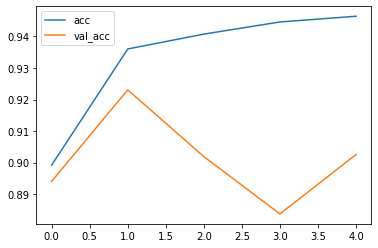

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

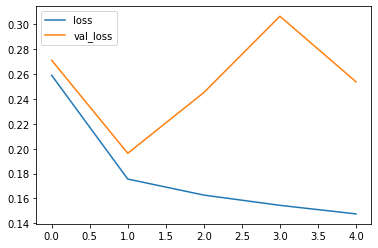

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [53]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    if prediction == 0:
        print("Predicted sentiment: Negative")
    elif prediction == 1:
        print("Predicted sentiment: Positive")

test_sentence1 = "мне не нравятся эти ужасные одежды"
predict_sentiment(test_sentence1)
test_sentence2 = "платье, которое я заказал отличное"
predict_sentiment(test_sentence2)
test_sentence3 = "Я подерживаю действа моих товарищей"
predict_sentiment(test_sentence3)
test_sentence4 = "Самый отвратительный комплекс! Управляющая компания не хочет работать! Охрана толком не работает ещё и ругается! Живу тут два месяца уже пожалела 1000 раз"
predict_sentiment(test_sentence4)

predict_sentiment("огромное спасибо менеджеру Андрею,который помог выбрать достойную квартиру и ответить на все вопросы ,звонок от него получила в 10 54. по общему телефону,к сожалению не знаю его фамилии.")

predict_sentiment("близость метро, 30 минут и ты в центре, очень удобно. инфраструктура строится. за те деньги которые мы заплатили за квартиру это было отличное предложение.")

print("\nPolonais :")
predict_sentiment("Witam, lubię te ciuchy")

print("\nBiélorusse :")
predict_sentiment("Прывітанне, я ненавіджу гэтую вопратку")

print("\nUkrainien :")
predict_sentiment("Привіт, я ненавиджу цей одяг")

predict_sentiment("Привіт, мені подобається цей одяг")

print("\nAnglais :")
predict_sentiment("Hello, I like these clothes")

predict_sentiment("Hello, I hate these clothes")

print("\nSerbe")
predict_sentiment("Здраво, свиђа ми се ова одећа")

predict_sentiment("Здраво, мрзим ову одећу")

Predicted sentiment: Negative
Predicted sentiment: Positive
Predicted sentiment: Positive
Predicted sentiment: Negative
Predicted sentiment: Positive
Predicted sentiment: Positive

Polonais :
Predicted sentiment: Positive

Biélorusse :
Predicted sentiment: Negative

Ukrainien :
Predicted sentiment: Negative
Predicted sentiment: Positive

Anglais :
Predicted sentiment: Positive
Predicted sentiment: Positive

Serbe
Predicted sentiment: Positive
Predicted sentiment: Positive
